In [1]:
from pyulog import ULog
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [402]:
log = ULog('/home/roman/Stažené/aa498c27-4daa-4518-8af4-76d635fb14cd.ulg')
#[x.name for x in log.data_list]

In [403]:
df_airspeed = pd.DataFrame(log.get_dataset('airspeed').data).set_index('timestamp')
#df_local_pos = pd.DataFrame(log.get_dataset('estimator_local_position').data).set_index('timestamp')
df_local_pos = pd.DataFrame(log.get_dataset('vehicle_local_position').data).set_index('timestamp')
df_setpoint = pd.DataFrame(log.get_dataset('vehicle_rates_setpoint').data).set_index('timestamp')

In [404]:
df = pd.concat([df_airspeed, df_local_pos, df_setpoint], sort=True)
df = df.interpolate(method='polynomial', order=2)

In [435]:
dfc = df
#crop = (df.index[100000], df.index[-100])
#print(crop)
dfc = df.iloc[14000:-500]
#print(df.shape)
#print(dfc.shape)

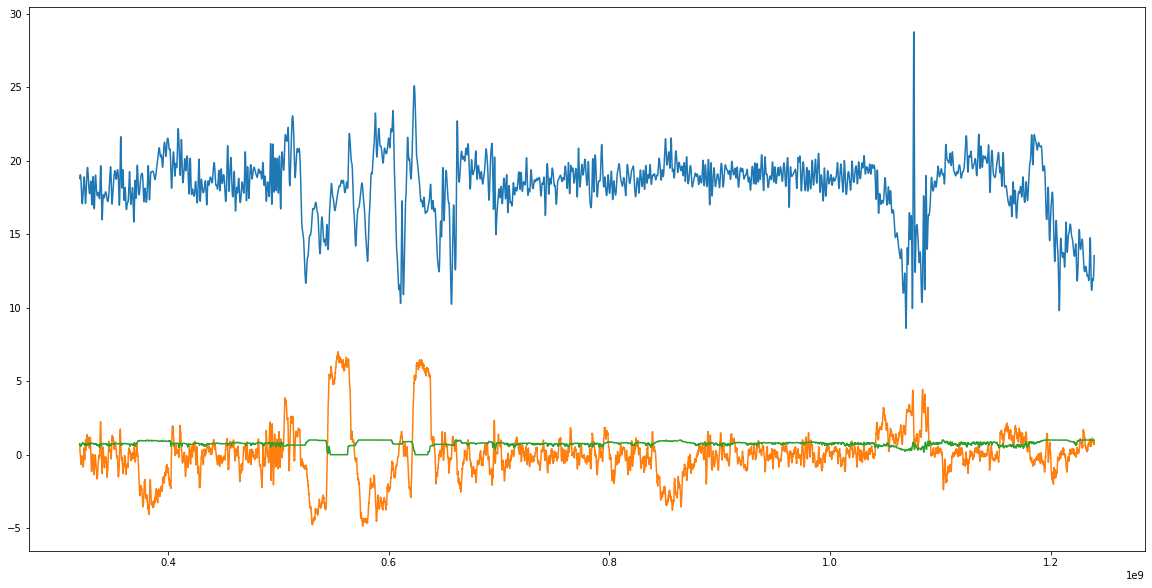

In [436]:
plt.plot(dfc['indicated_airspeed_m_s'])
plt.plot(dfc['vz'])
plt.plot(dfc['thrust_body[0]'])
#plt.plot(dfc['z'])
#plt.vlines(crop[0], -10, 10)
#plt.vlines(crop[1], -10, 10)

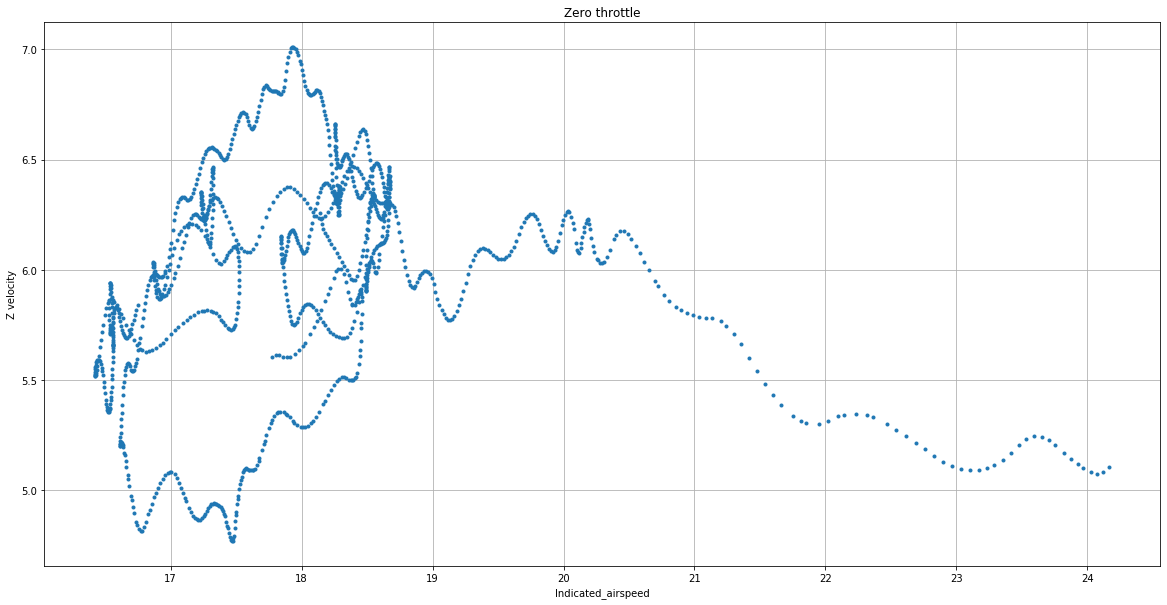

In [437]:
plt.plot(dfc[dfc['thrust_body[0]']<0.01]['indicated_airspeed_m_s'], dfc[dfc['thrust_body[0]']<0.01]['vz'], '.')
plt.xlabel('Indicated_airspeed')
plt.ylabel('Z velocity')
plt.title("Zero throttle")
plt.grid()

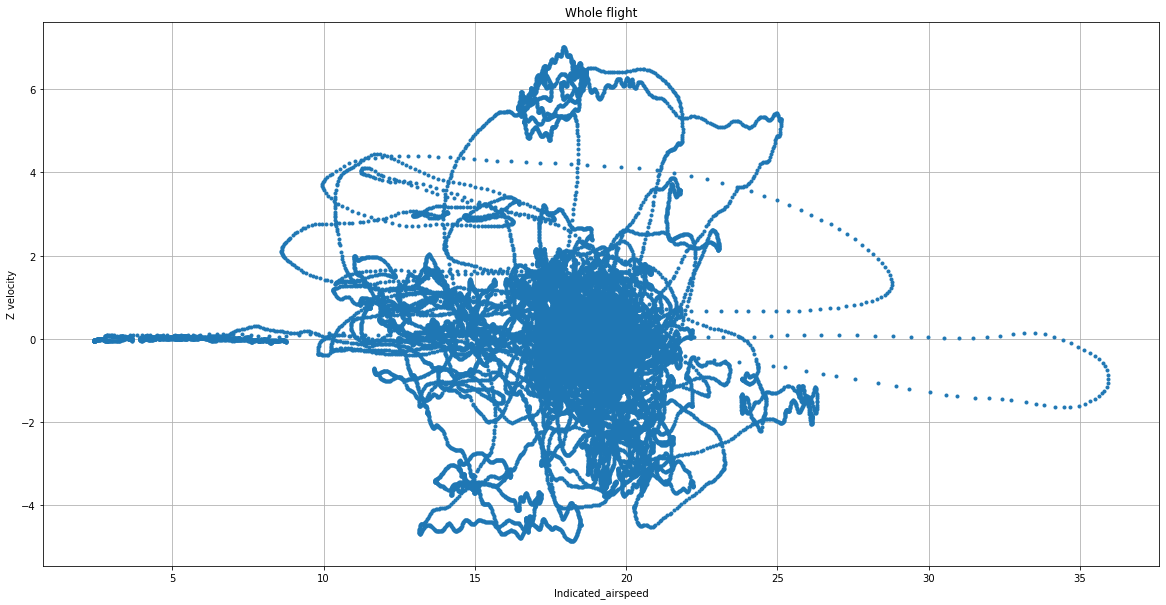

In [440]:
plt.plot(df[df['thrust_body[0]']<1.1]['indicated_airspeed_m_s'], df[df['thrust_body[0]']<1.1]['vz'], '.')
plt.xlabel('Indicated_airspeed')
plt.ylabel('Z velocity')
plt.title("Whole flight")
plt.grid()

In [439]:
df.index[crop[0]:crop[1]]

UInt64Index([], dtype='uint64', name='timestamp')

## 